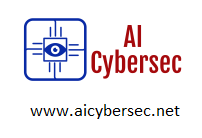

## Classification

In [ ]:
# Load libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Loading Data
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("d:/data/pima-indians-diabetes.csv", header=None, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset in features and target variable

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


In [ ]:
# Optimisation with some parameters

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [ ]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [82]:
from sklearn.datasets import load_iris # Classification with new dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# Graphical plot for the decision tree

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

In [83]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [84]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
y 

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [86]:
y = pd.get_dummies(y)

In [87]:
y

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [89]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

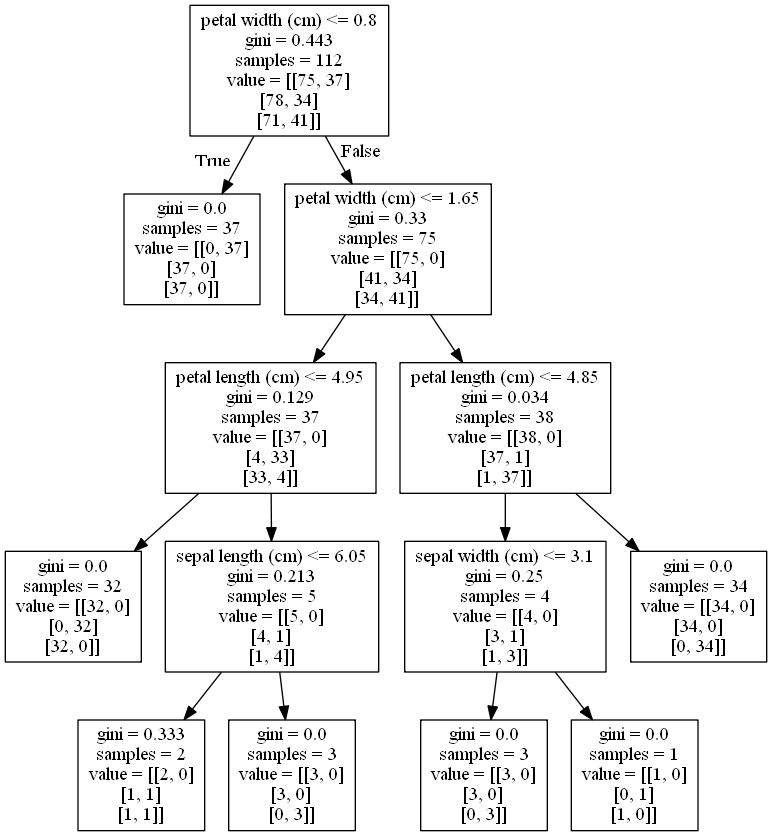

In [90]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Regression

In [17]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
import numpy as np
X = dataset['Temperature'].values
y = dataset['Revenue'].values
dataset.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [37]:
# Fitting Decision Tree Regression to the dataset

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [38]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [39]:
y_pred

array([406.5792487 , 726.2337713 ,  32.54661902, 444.8268017 ,
       506.4321353 , 683.5447809 , 969.2916296 , 412.0650006 ,
       256.772593  , 441.0029443 , 651.8615363 , 591.1733898 ,
       782.0125497 , 685.6546554 , 546.6938576 , 325.9684084 ,
       216.183462  , 499.4583433 , 456.524341  , 581.0740052 ,
       542.8391063 , 198.1215634 , 661.4675188 , 500.0657787 ,
       507.900282  ])

In [40]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,376.554472,406.579249
1,643.788331,726.233771
2,55.390338,32.546619
3,475.213354,444.826802
4,586.138767,506.432135
5,696.640178,683.544781
6,965.493040,969.291630
7,402.793174,412.065001
8,283.834327,256.772593
9,413.914067,441.002944


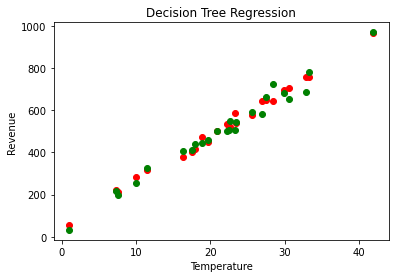

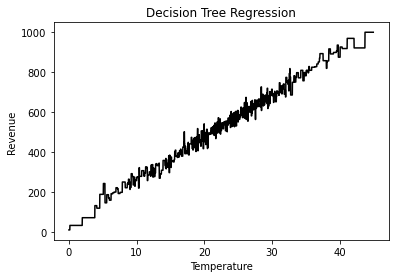

In [41]:
# Visualising the Decision Tree Regression Results 

import matplotlib.pyplot as plt
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()
#
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [ ]:
########################################################################

In [ ]:
pip install dtreeviz

In [18]:
# Load packages
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [19]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [20]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X, y)

RandomForestRegressor(n_estimators=50)

In [21]:
# Decision Trees are stored in a list in the estimators_ attribute in the rf model. We can check the length of the 
# list, which should be equal to n_estiamtors value.

len(rf.estimators_)

50

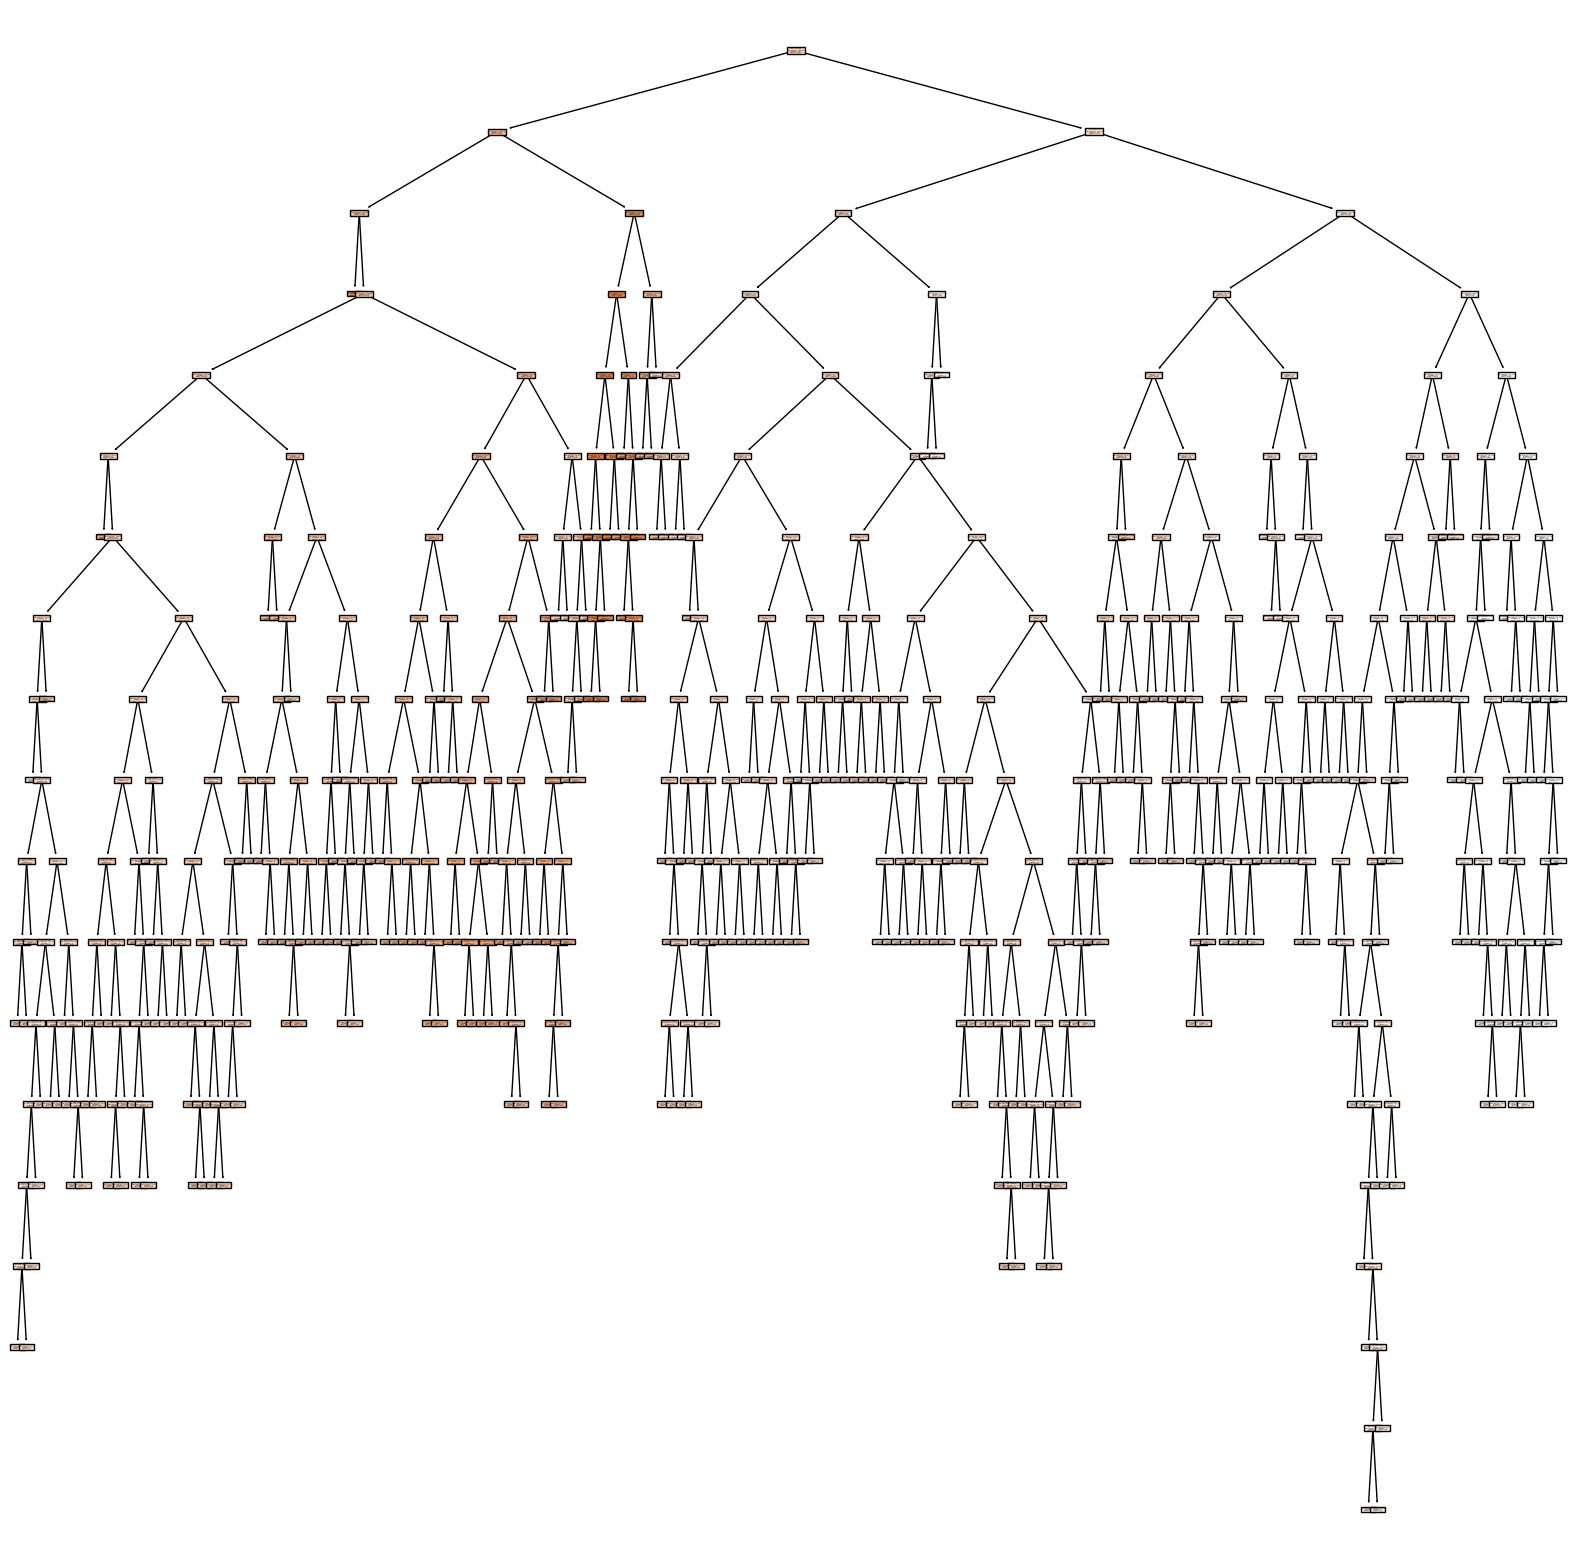

In [22]:
# We can plot a first Decision Tree from the Random Forest (with index 0 in the list):

plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

In [11]:
# Do you understand anything? The tree is too large to visualize it in one figure and make it readable.

# Let’s check the depth of the first tree from the Random Forest:

rf.estimators_[0].tree_.max_depth

19

In [12]:
#Our first tree has max_depth=16. Other trees have similar depth. To make visualization readable it will be good to limit 
#the depth of the tree. In MLJAR’s open-source AutoML package mljar-supervised the Decision Tree’s depth is set to be in 
#range from 1 to 4. Let’s train the Random Forest again with max_depth=3.

rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X, y)

RandomForestRegressor(max_depth=3)

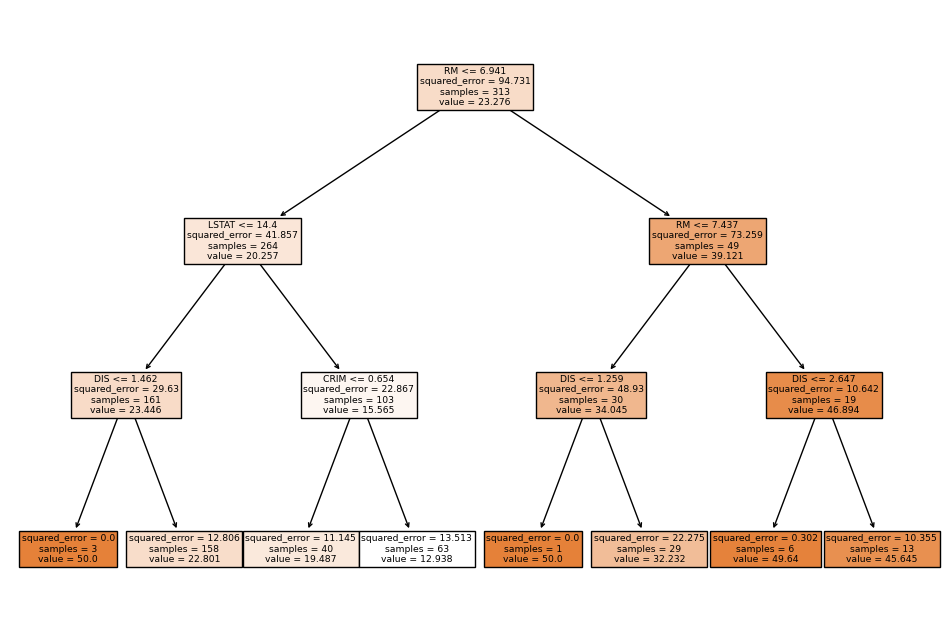

In [13]:
#The plot of first Decision Tree:

_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

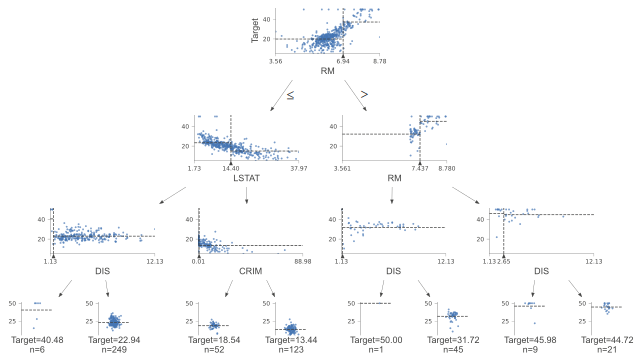

In [14]:
#We can use dtreeviz package to visualize the first Decision Tree:

viz = dtreeviz(rf.estimators_[0], X, y, feature_names=X.columns, target_name="Target")
viz

#### Summary

I show you how to visualize the single Decision Tree from the Random Forest. Trees can be accessed by integer index from estimators_ list. Sometimes when the tree is too deep, it is worth to limit the depth of the tree with max_depth hyper-parameter. What is interesting, limiting the depth of the trees in the Random Forest will make the final model much smaller in terms of used RAM memory and disk space needed to save the model. It will also change the performance of the default Random Forest (with full trees), it will help or not, depending on the data set.